Acquired data form:
weather: https://www.kaggle.com/datasets/ananthr1/weather-prediction
Police report: https://www.kaggle.com/datasets/sam/seattle-crime?resource=download

Pull in the data sets

In [18]:
import pandas as pd
#import the csv files
weather = pd.read_csv("seattle-weather.csv")
reports = pd.read_csv("SPD_Reports.csv")


#remove data that will be unused
reports.drop(columns=["Offense Description", "Block", "District","Beat","2000 Census Tract","Longitude","Latitude","Offense Start Date","Offense End Date"],inplace=True)

#fix data types
reports["Report Date"] = pd.to_datetime(reports["Report Date"])
weather["date"] = pd.to_datetime(weather["date"])

#look at data info
weather.info()
print(weather.head())
print(weather.tail())
print()

reports.info()
print(reports.head())
print(reports.tail())
print()

print(reports["Offense Type"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB
        date  precipitation  temp_max  temp_min  wind  weather
0 2012-01-01            0.0      12.8       5.0   4.7  drizzle
1 2012-01-02           10.9      10.6       2.8   4.5     rain
2 2012-01-03            0.8      11.7       7.2   2.3     rain
3 2012-01-04           20.3      12.2       5.6   4.7     rain
4 2012-01-05            1.3       8.9       2.8   6.1     rain
           date  precipitation  temp

In [23]:
# Define the date range covered by data sets
start_date = pd.to_datetime("2014-01-17")
end_date = pd.to_datetime("2015-12-31")

# Filter out unusable records
reports_filtered = reports[(reports["Report Date"] >= start_date) & (reports["Report Date"] <= end_date)]
weather_filtered = weather[(weather["date"] >= start_date) & (weather["date"] <= end_date)]

# Look at data info
print(weather_filtered.head())
print(weather_filtered.tail())
print()
print(reports_filtered.head())
print(reports_filtered.tail())
print()

          date  precipitation  temp_max  temp_min  wind weather
747 2014-01-17            0.0       5.6       2.8   2.3     sun
748 2014-01-18            0.0       9.4       0.6   2.2     sun
749 2014-01-19            0.0       6.1       3.3   2.5     sun
750 2014-01-20            0.0      10.0       2.8   2.2     sun
751 2014-01-21            0.0      10.0       1.7   1.5     sun
           date  precipitation  temp_max  temp_min  wind weather
1456 2015-12-27            8.6       4.4       1.7   2.9    rain
1457 2015-12-28            1.5       5.0       1.7   1.3    rain
1458 2015-12-29            0.0       7.2       0.6   2.6     fog
1459 2015-12-30            0.0       5.6      -1.0   3.4     sun
1460 2015-12-31            0.0       5.6      -2.1   3.5     sun

            Offense Type         Report Date
40     WEAPON-POSSESSION 2015-11-12 06:00:00
41    BURGLARY-FORCE-RES 2015-11-25 14:41:00
42   NARC-POSSESS-MARIJU 2015-12-17 00:07:00
50         ASSLT-AGG-GUN 2015-08-23 03:13:00


In [26]:
#merge data sets
merged_data = pd.merge(weather, reports, left_on="date",right_on="Report Date", how="inner")

#check to see if it worked as intended
print(merged_data.info())
print(merged_data.head())
print(merged_data.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           181 non-null    datetime64[ns]
 1   precipitation  181 non-null    float64       
 2   temp_max       181 non-null    float64       
 3   temp_min       181 non-null    float64       
 4   wind           181 non-null    float64       
 5   weather        181 non-null    object        
 6   Offense Type   181 non-null    object        
 7   Report Date    181 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(4), object(2)
memory usage: 11.4+ KB
None
        date  precipitation  temp_max  temp_min  wind weather  \
0 2012-01-09            4.3       9.4       5.0   3.4    rain   
1 2012-01-09            4.3       9.4       5.0   3.4    rain   
2 2012-01-10            1.0       6.1       0.6   3.4    rain   
3 2012-01-10            1.0       6.1       0.6  

In [ ]:
Discover interesting relations


Average Precipitation by Offense Type:
Offense Type
ASSLT-AGG-BODYFORCE                0.083333
ASSLT-AGG-WEAPON                   1.500000
ASSLT-NONAGG                       0.100000
BURGLARY-FORCE-NONRES              3.600000
BURGLARY-FORCE-RES                 0.720000
BURGLARY-NOFORCE-NONRES            0.000000
BURGLARY-NOFORCE-RES               0.000000
DISTURBANCE-NOISE                  2.000000
DISTURBANCE-OTH                    1.100000
DUI-LIQUOR                         8.600000
FRAUD-CHECK                        0.000000
FRAUD-CREDIT CARD                  4.300000
FRAUD-OTHER                        0.000000
HARASSMENT                         0.800000
LIQUOR LAW VIOLATION               0.000000
NARC-FOUND-COCAINE                18.800000
NARC-POSSESS-COCAINE               1.500000
NARC-POSSESS-METH                  0.800000
PROPERTY DAMAGE-NON RESIDENTIA     3.071429
PROPERTY DAMAGE-RESIDENTIAL        6.925000
PROPERTY FOUND                     0.045455
PROSTITUTION           

array([[<Axes: xlabel='temp_max', ylabel='temp_max'>,
        <Axes: xlabel='precipitation', ylabel='temp_max'>,
        <Axes: xlabel='temp_min', ylabel='temp_max'>,
        <Axes: xlabel='wind', ylabel='temp_max'>],
       [<Axes: xlabel='temp_max', ylabel='precipitation'>,
        <Axes: xlabel='precipitation', ylabel='precipitation'>,
        <Axes: xlabel='temp_min', ylabel='precipitation'>,
        <Axes: xlabel='wind', ylabel='precipitation'>],
       [<Axes: xlabel='temp_max', ylabel='temp_min'>,
        <Axes: xlabel='precipitation', ylabel='temp_min'>,
        <Axes: xlabel='temp_min', ylabel='temp_min'>,
        <Axes: xlabel='wind', ylabel='temp_min'>],
       [<Axes: xlabel='temp_max', ylabel='wind'>,
        <Axes: xlabel='precipitation', ylabel='wind'>,
        <Axes: xlabel='temp_min', ylabel='wind'>,
        <Axes: xlabel='wind', ylabel='wind'>]], dtype=object)

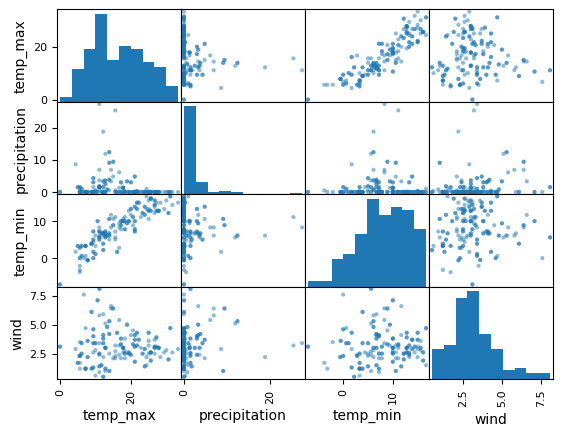

In [34]:
from pandas.plotting import scatter_matrix

compare = ["date","temp_max","precipitation","temp_min","wind"]
scatter_matrix(merged_data[compare])

No strong correlation (except temp_min and temp_max) appears to be present. However, this does not really show criminal activity vs weather conditions.
Insetat we should be able to see this by clumping of values on certain days. If the weather does play a role in criminal activity then dates will stand out if we count the number of records mapped to them. 

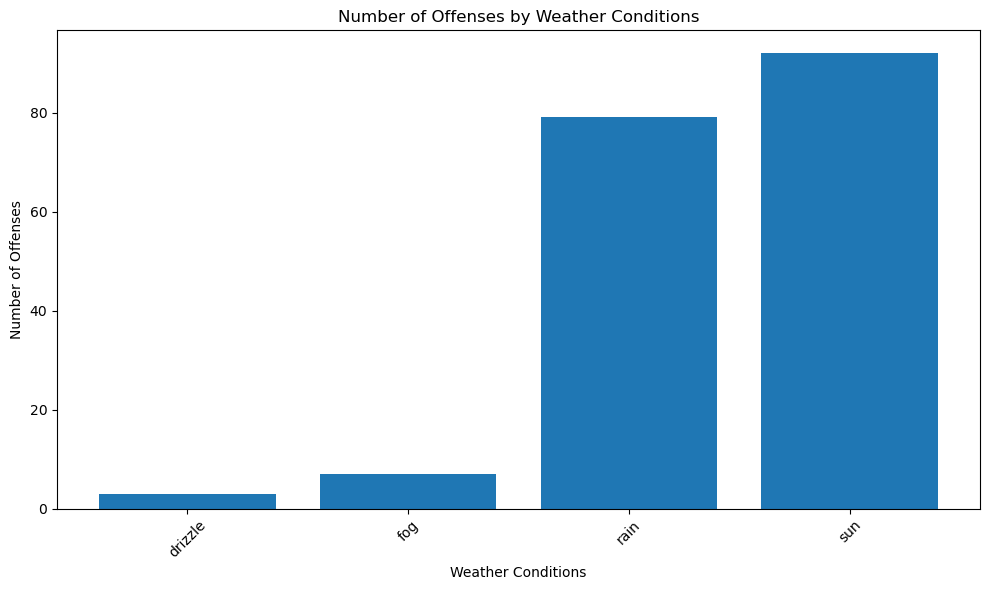

In [38]:
#to do this
# group data by weather
weather_conditions_agg = merged_data.groupby(["weather"]).size().reset_index(name='Offense Count')

# Visualize the relationship between weather conditions and number of offenses
plt.figure(figsize=(10, 6))
plt.bar(weather_conditions_agg["weather"], weather_conditions_agg["Offense Count"])
plt.xlabel("Weather Conditions")
plt.ylabel("Number of Offenses")
plt.title("Number of Offenses by Weather Conditions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
Clean the data

In [ ]:
Create training/test sets